# PCA + classification models on MNIST data

The MNIST database of handwritten digits. It is a subset of a larger set available from NIST <br>


## Preprocessing...

### getting data

In [3]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib_inline as plt
import sklearn as sk
%matplotlib inline

In [4]:
# importing data from sklearn library
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784')

In [5]:
#checking data 
mnist.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
mnist.target_names

['class']

### splitting data

In [7]:
#importing train test split
from sklearn.model_selection import train_test_split

In [8]:
img_train,img_test,lbl_train,lbl_test=train_test_split(mnist.data,mnist.target,
                                                      test_size=0.2,
                                                      random_state=1)

In [9]:
#checking shape
img_train.shape

(56000, 784)

In [10]:
#checking 
img_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
57050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21440,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
#checking shape
img_test.shape

(14000, 784)

In [12]:
#checking 
img_test

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
6670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
b=pd.DataFrame(img_test)

In [14]:
# checking lbl_train data
lbl_train

57050    9
66119    7
2762     1
6182     3
35804    9
        ..
49100    5
20609    0
21440    5
50057    0
5192     0
Name: class, Length: 56000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [15]:
#checking lbl_train shape
lbl_train.shape

(56000,)

In [16]:
lbl_test.shape

(14000,)

### standardising the data

In [17]:
# importing standard scalar
from sklearn.preprocessing import StandardScaler

In [18]:
#creating object
scaler=StandardScaler()

In [19]:
# Fit on training set only.
scaler.fit(img_train)

StandardScaler()

In [20]:
# Apply transform to both the training set and the test set.
img_train = scaler.transform(img_train)
img_test = scaler.transform(img_test)

## logistic regression without PCA
building logistic regression without PCA to check efficiency of PCA 

In [21]:
#importing logistic regression
from sklearn.linear_model import LogisticRegression

In [22]:
# creating logistic regression object
logiReg_without_PCA=LogisticRegression(random_state=1,
                                      verbose=1)

In [23]:
#fitting data to object
logiReg_without_PCA.fit(img_train,lbl_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\MBA-RAJESH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.4s finished


LogisticRegression(random_state=1, verbose=1)

In [24]:
#testing model with test data
pred_logiReg_without_PCA=logiReg_without_PCA.predict(img_test)

In [25]:
#checking true false predictions using value_counts()
(pred_logiReg_without_PCA==lbl_test).value_counts()

True     12754
False     1246
Name: class, dtype: int64

In [26]:
#importing classification report and confusion matrix to assess model perfromance
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
# Obtaining confusion matrix
(confusion_matrix(lbl_test,pred_logiReg_without_PCA))
## confusion matrix is pretty hard to interpret
##lets go for classification report

array([[1317,    0,   13,    2,    7,   14,   11,    5,    9,    2],
       [   1, 1580,   12,   10,    0,    6,    1,    3,   16,    3],
       [  14,   14, 1270,   37,   17,    6,   15,   15,   36,    9],
       [   9,    4,   38, 1250,    3,   47,    2,   18,   39,   21],
       [   2,    8,   18,    4, 1204,    6,    7,   13,   20,   46],
       [   9,    8,    8,   42,   20, 1119,   26,   11,   39,   15],
       [  12,    1,   13,    3,   13,   21, 1256,    0,   11,    1],
       [   7,    7,   12,    5,   18,    2,    1, 1344,    3,   45],
       [  11,   28,   20,   29,    9,   33,   13,    6, 1182,   20],
       [   4,   10,    4,   17,   47,    6,    1,   42,   10, 1232]],
      dtype=int64)

In [28]:
# Obtaining classification report
print(classification_report(lbl_test,pred_logiReg_without_PCA))
## model accuracy is 92%

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1380
           1       0.95      0.97      0.96      1632
           2       0.90      0.89      0.89      1433
           3       0.89      0.87      0.88      1431
           4       0.90      0.91      0.90      1328
           5       0.89      0.86      0.88      1297
           6       0.94      0.94      0.94      1331
           7       0.92      0.93      0.93      1444
           8       0.87      0.87      0.87      1351
           9       0.88      0.90      0.89      1373

    accuracy                           0.91     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.91      0.91      0.91     14000



***Logistic Regression without PCA gives model accuracy of 91% <br>
It took 16 seconds for model to excecute code<br>
Lets go for Logistic regression with PCA and see results***

## PCA

In [29]:
# importing PCA
from sklearn.decomposition import PCA

In [30]:
#creating PCA object which gives pricipal components explaining 95% of variation
mnist_pca= PCA(n_components=0.95,
              random_state=1)

In [31]:
# fitting data to PCA object
mnist_pca.fit(img_train)

PCA(n_components=0.95, random_state=1)

In [32]:
#getting no. of optimum Principal components
mnist_pca.n_components_
## 328 principal components explaines 95% of variation in data

328

***Initially, we had 784 columns or components, we reduced them to <code>328</code> columns retaining<br> 95% of variation in data, With the help of PCA...***

Apply the mapping (transform) to <b>both</b> the training set and the test set. 

In [33]:
img_train_pca= mnist_pca.transform(img_train)
img_test_pca = mnist_pca.transform(img_test)

## classification models

### logistic regression with PCA

In [34]:
#importing logistic regression
from sklearn.linear_model import LogisticRegression

In [35]:
# creating object
logiReg_with_PCA=LogisticRegression(random_state=1,
                                   verbose=1)

In [36]:
#fitting data to object
logiReg_with_PCA.fit(img_train_pca,lbl_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\MBA-RAJESH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.7s finished


LogisticRegression(random_state=1, verbose=1)

In [37]:
#testing model with test data
pred_logiReg_with_PCA=logiReg_with_PCA.predict(img_test_pca)

In [38]:
# checking true and false 
(pred_logiReg_with_PCA==lbl_test).value_counts()
## seems model deteriorated

True     12860
False     1140
Name: class, dtype: int64

In [39]:
# importing classification report confusion matrix to evaluate logistic model performance with PCA
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
#getting confusion matrix
confusion_matrix(pred_logiReg_with_PCA,lbl_test)

array([[1327,    1,    8,    9,    2,    6,    9,    5,    9,    6],
       [   0, 1584,   12,    4,    9,    9,    1,    7,   31,    9],
       [   4,   13, 1286,   30,   14,    5,    9,   15,   14,    4],
       [   4,    9,   28, 1271,    2,   38,    0,    7,   25,   19],
       [   7,    0,   14,    2, 1220,   20,   12,   15,    9,   41],
       [  10,    4,    7,   43,    1, 1140,   27,    1,   40,    4],
       [  13,    0,   14,    0,    7,   22, 1263,    1,    7,    1],
       [   3,    2,   18,   20,   10,   11,    0, 1349,    6,   46],
       [   9,   17,   38,   33,   17,   37,    9,    1, 1188,   11],
       [   3,    2,    8,   19,   46,    9,    1,   43,   22, 1232]],
      dtype=int64)

In [41]:
# getting classification report
print(classification_report(pred_logiReg_with_PCA,lbl_test))
##model accuracy is 92% 

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1382
           1       0.97      0.95      0.96      1666
           2       0.90      0.92      0.91      1394
           3       0.89      0.91      0.90      1403
           4       0.92      0.91      0.91      1340
           5       0.88      0.89      0.89      1277
           6       0.95      0.95      0.95      1328
           7       0.93      0.92      0.93      1465
           8       0.88      0.87      0.88      1360
           9       0.90      0.89      0.89      1385

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000



***logistic regression with PCA has accuracy of <code>92%</code>, whcih is greater than  the logistic regression without PCA by 1%<br>
It took <code>7.5seconds</code>  which is less than Logistic regression without PCA***


#### conclusion
<code> With Principal Component analysis(PCA), we are able to reduce dimensions of the data from 784 columns to 328 columns and Build Logistic Regression with imporved accuracy and less time </code> <br>
Thus PCA helps to reduce components while retaining variance in data.<br>
PCA can be used in EDA for smoother model building 

### KNN algorithm on mnist data


In [42]:
# importing KNN algorithm
from sklearn.neighbors import KNeighborsClassifier

In [43]:
# creating kNN object
KNN_mnist_pcaData=KNeighborsClassifier()

In [44]:
#fitting data to KNN object
KNN_mnist_pcaData.fit(img_train_pca,lbl_train
                     )

KNeighborsClassifier()

In [46]:
# predicting using test data
knn_predictions=KNN_mnist_pcaData.predict(img_test_pca)

In [48]:
# comparing prediction values and actual values
(knn_predictions==lbl_test).value_counts()

True     13295
False      705
Name: class, dtype: int64

In [49]:
# obtaining confusion matrix
confusion_matrix(lbl_test,knn_predictions)

array([[1356,    1,    6,    0,    0,    3,   11,    2,    0,    1],
       [   1, 1613,   10,    1,    2,    1,    3,    1,    0,    0],
       [  12,    6, 1355,   19,    7,    1,   11,    8,   11,    3],
       [   4,    6,   11, 1347,    2,   17,    1,   19,   16,    8],
       [   1,   11,   12,    1, 1248,    3,    4,    4,    1,   43],
       [   8,    3,    3,   28,    3, 1214,   20,    4,    5,    9],
       [   9,    3,    4,    0,    2,   15, 1295,    0,    3,    0],
       [   6,   12,    7,    1,    7,    0,    0, 1377,    1,   33],
       [  11,   13,   10,   14,   16,   44,    5,    4, 1217,   17],
       [   4,    5,    8,    8,   26,    1,    0,   41,    7, 1273]],
      dtype=int64)

In [52]:
# obtaining classification report
print(classification_report(lbl_test,knn_predictions))
## accuracy of KNN is 95%

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1380
           1       0.96      0.99      0.98      1632
           2       0.95      0.95      0.95      1433
           3       0.95      0.94      0.95      1431
           4       0.95      0.94      0.95      1328
           5       0.93      0.94      0.94      1297
           6       0.96      0.97      0.97      1331
           7       0.94      0.95      0.95      1444
           8       0.97      0.90      0.93      1351
           9       0.92      0.93      0.92      1373

    accuracy                           0.95     14000
   macro avg       0.95      0.95      0.95     14000
weighted avg       0.95      0.95      0.95     14000



#### Conclusion 

<code>on comparing accuracy of kNN and accuracy of Logistic Regression <br>
kNN is much more accurate</code>

### Naive Bayes on MNIST DATA

In [58]:
# imporitng Navie bayes
from sklearn.naive_bayes import GaussianNB

In [59]:
# creating Object
nb_mnist_pca=GaussianNB()

In [60]:
# fitting data to object
nb_mnist_pca.fit(img_train_pca,lbl_train)

GaussianNB()

In [62]:
# predicting with test data
nb_predictions= nb_mnist_pca.predict(img_test_pca)

In [63]:
# checking predictions and actuals
(nb_predictions==lbl_test).value_counts()

False    7575
True     6425
Name: class, dtype: int64

In [64]:
# confusion matrix for naive bayes
confusion_matrix(lbl_test,nb_predictions)

array([[1241,    0,   50,   12,   24,   45,    4,    0,    3,    1],
       [  19, 1538,   13,    6,   44,    4,    0,    1,    6,    1],
       [ 207,   22,  465,   82,  376,   57,   10,    2,  205,    7],
       [ 773,   60,  110,  204,   74,   35,    0,   28,  123,   24],
       [  13,   76,   95,    7, 1061,   39,    1,   14,    3,   19],
       [ 437,   18,  102,   19,  227,  295,    6,    3,  177,   13],
       [ 563,   10,   74,    7,  279,  113,  250,    0,   35,    0],
       [ 312,   99,   25,   18,  326,   15,    0,  299,    6,  344],
       [ 352,   91,   79,   13,  142,   42,    2,    1,  607,   22],
       [ 245,  101,   48,    2,  446,    4,    0,   56,    6,  465]],
      dtype=int64)

In [66]:
# getting classification report
print(classification_report(lbl_test,nb_predictions))

              precision    recall  f1-score   support

           0       0.30      0.90      0.45      1380
           1       0.76      0.94      0.84      1632
           2       0.44      0.32      0.37      1433
           3       0.55      0.14      0.23      1431
           4       0.35      0.80      0.49      1328
           5       0.45      0.23      0.30      1297
           6       0.92      0.19      0.31      1331
           7       0.74      0.21      0.32      1444
           8       0.52      0.45      0.48      1351
           9       0.52      0.34      0.41      1373

    accuracy                           0.46     14000
   macro avg       0.56      0.45      0.42     14000
weighted avg       0.56      0.46      0.43     14000



#### conclusion
Naive bayes is not working on this data. It's accuracy is very poor

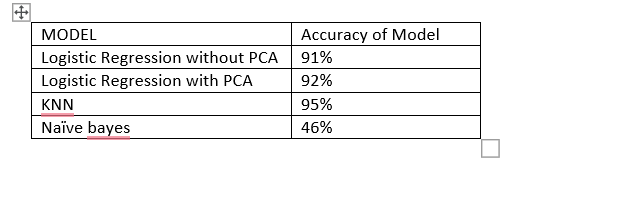

KNN algorithm works best on mnist data

In [68]:
from sklearn.svm import SVC